<a href="https://colab.research.google.com/github/rishi-29-02/Aspiration-Career-Launcher/blob/main/Module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 6 : Clustering for Diversification Analysis

Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

# 6.1

Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#from google.colab import files
#uploaded = files.upload()

In [36]:
# SMALLCAP:
# ASHOKA,BAJAJELEC,FORTIS,BOMDYEING,CENTURYPLY,PVR,IDFC,NCC,RAYMOND,VIPIND.
df_ashoka = pd.read_csv('ASHOKA.csv')
df_bajajelec = pd.read_csv('BAJAJELEC.csv')
df_bomdyeing = pd.read_csv('BOMDYEING.csv')
new_dfenturyply = pd.read_csv('CENTURYPLY.csv')
df_fortis = pd.read_csv('FORTIS.csv')
df_pvr = pd.read_csv('PVR.csv')
df_idfc = pd.read_csv('IDFC.csv')
df_ncc = pd.read_csv('NCC.csv')
df_raymond = pd.read_csv("RAYMOND.csv")
df_vipind = pd.read_csv('VIPIND.csv')

# MIDDLECAP:
# TATACHEM,EXIDEIND,GMRINFRA,GODREJIND,IDBI,IGL,PNB,TATAPOWER,SUNTV,VOLTAS.
df_suntv = pd.read_csv("SUNTV.csv")
df_tatapower = pd.read_csv("TATAPOWER.csv")
df_tatachem = pd.read_csv('TATACHEM.csv')
df_exideind = pd.read_csv('EXIDEIND.csv')
df_gmrinfra = pd.read_csv('GMRINFRA.csv')
df_godrejind = pd.read_csv('GODREJIND.csv')
df_idbi = pd.read_csv('IDBI.csv')
df_igl = pd.read_csv('IGL.csv')
df_pnb = pd.read_csv('PNB.csv')
df_voltas = pd.read_csv('VOLTAS.csv')

# LARGECAP:
# BAJFINANCE,TITAN,RELAINCE,GAIL,IOC,ITC,LT,MARUTI,M&M,TCS.
df_titan = pd.read_csv("TITAN.csv")
df_bajfinance = pd.read_csv("BAJFINANCE.csv")
df_reliance = pd.read_csv('RELIANCE.csv')
df_gail = pd.read_csv('GAIL.csv')
df_ioc = pd.read_csv('IOC.csv')
df_itc = pd.read_csv('ITC.csv')
df_lt = pd.read_csv('LT.csv')
df_maruti = pd.read_csv('MARUTI.csv')
df_mm = pd.read_csv('M&M.csv')
df_tcs = pd.read_csv('TCS.csv')

df_stocks = pd.DataFrame({'ASHOKA': df_ashoka['Close Price'],
                          'BAJAJELEC': df_bajajelec['Close Price'],
                          'BOMDYEING': df_bomdyeing['Close Price'],
                          'CENTURYPLY': new_dfenturyply['Close Price'],
                          'FORTIS': df_fortis['Close Price'],
                          'PVR': df_pvr['Close Price'],
                          'IDFC': df_idfc['Close Price'],
                          'NCC': df_ncc['Close Price'],
                          'RAYMOND': df_raymond['Close Price'],
                          'VIPIND': df_vipind['Close Price'],
                          'SUNTV': df_suntv['Close Price'],
                          'TATAPOWER': df_tatapower['Close Price'],
                          'TATACHEM': df_tatachem['Close Price'],
                          'EXIDEIND': df_exideind['Close Price'],
                          'GMRINFRA': df_gmrinfra['Close Price'],
                          'GODREJIND': df_godrejind['Close Price'],
                          'IDBI': df_idbi['Close Price'],
                          'IGL': df_igl['Close Price'],
                          'PNB': df_pnb['Close Price'],
                          'VOLTAS': df_voltas['Close Price'],
                          'TITAN': df_titan['Close Price'],
                          'BAJFINANCE': df_bajfinance['Close Price'],
                          'RELIANCE': df_reliance['Close Price'],
                          'GAIL': df_gail['Close Price'],
                          'IOC': df_ioc['Close Price'],
                          'ITC': df_itc['Close Price'],
                          'LT': df_lt['Close Price'],
                          'MARUTI': df_maruti['Close Price'],
                          'MM': df_mm['Close Price'],
                          'TCS': df_tcs['Close Price']
                          })
df_stocks.dropna(inplace=True)
df_stocks

,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS,PVR,IDFC,NCC,RAYMOND,VIPIND,SUNTV,TATAPOWER,TATACHEM,EXIDEIND,GMRINFRA,GODREJIND,IDBI,IGL,PNB,VOLTAS,TITAN,BAJFINANCE,RELIANCE,GAIL,IOC,ITC,LT,MARUTI,MM,TCS
0,216.05,341.15,82.20,266.65,205.25,1524.95,63.70,97.35,772.80,199.20,912.20,83.55,629.80,245.80,17.55,578.55,75.05,1000.25,166.80,431.85,483.65,1332.95,1344.10,414.00,442.10,277.95,1742.40,6823.90,1375.65,2365.10
1,214.90,347.00,83.40,266.10,207.90,1539.00,64.25,100.40,785.00,200.90,894.70,83.85,643.90,244.70,17.40,584.80,76.65,1005.80,174.15,432.45,488.30,1347.75,1356.30,411.40,446.60,283.45,1740.70,6953.95,1366.35,2429.15
2,217.00,349.85,82.25,264.85,205.90,1530.30,63.35,101.45,783.65,199.65,887.05,85.35,638.10,243.20,17.30,588.60,75.95,1019.10,165.05,430.20,481.75,1324.80,1353.10,408.30,444.25,281.65,1755.45,6958.20,1378.80,2455.35
3,209.65,334.10,78.95,260.35,196.85,1515.05,61.50,97.00,746.95,193.30,871.35,83.75,624.90,239.85,16.75,574.60,69.95,1002.55,158.50,414.10,471.65,1314.55,1327.35,404.75,439.90,277.90,1722.60,6831.05,1352.85,2536.20
4,206.25,336.20,77.15,254.05,203.55,1513.55,61.15,95.45,723.10,195.95,852.40,84.15,616.45,238.15,16.95,578.00,68.75,1000.15,155.20,415.75,471.15,1289.15,1318.85,401.05,435.40,286.20,1724.55,6790.55,1333.40,2507.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,118.10,557.75,121.45,163.15,136.35,1802.30,37.75,97.55,808.95,430.15,551.10,65.85,577.15,212.65,16.00,484.30,37.25,309.20,83.95,601.45,1145.05,3034.30,1384.90,340.75,156.70,304.25,1366.60,6710.00,645.90,2260.35
490,115.45,534.45,119.35,161.30,135.20,1780.10,37.10,96.75,807.10,420.80,528.90,64.35,576.50,208.35,15.85,476.10,37.05,308.50,83.95,576.65,1082.85,3017.05,1343.50,337.50,153.45,307.00,1360.35,6709.65,645.80,2215.40
491,115.30,531.85,117.75,160.50,133.60,1748.50,37.60,93.70,805.30,431.50,540.70,64.50,556.50,209.80,16.05,471.30,37.45,306.90,84.25,574.10,1086.50,2921.30,1299.45,340.40,152.20,301.90,1356.45,6702.00,638.50,2132.00
492,117.45,540.90,117.05,160.50,133.00,1758.45,37.60,92.65,804.40,434.95,541.15,64.40,605.20,210.20,16.10,471.20,37.25,308.95,86.25,580.05,1088.70,2971.35,1256.45,341.55,150.60,300.65,1355.50,6650.15,636.00,2157.85


# 6.2

Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [37]:
returns = df_stocks.pct_change().dropna()

annual_return = returns.mean() * 252
annual_std_dev = returns.std() * np.sqrt(252)

new_df = pd.DataFrame({'Returns':annual_return,
                         'Volatility': annual_std_dev})
new_df

,Returns,Volatility
ASHOKA,-0.208509,0.442974
BAJAJELEC,0.316053,0.402414
BOMDYEING,0.327621,0.602869
CENTURYPLY,-0.182338,0.375269
FORTIS,-0.137297,0.421483
PVR,0.108530,0.310191
IDFC,-0.200489,0.353990
NCC,0.077142,0.441393
RAYMOND,0.070021,0.363834
VIPIND,0.479664,0.432069


# 6.3

Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

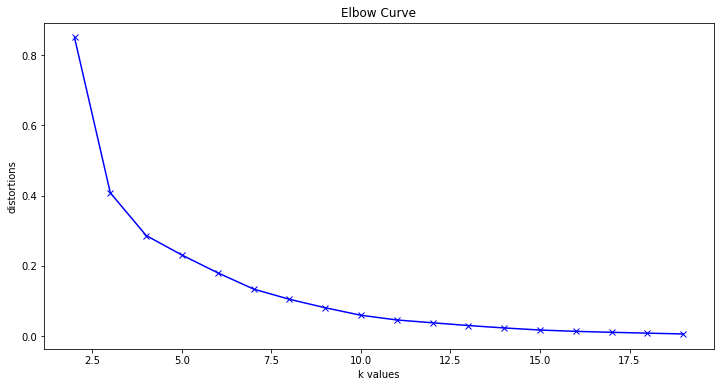

In [38]:
from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans

distorsions = []
for n in range(2, 20):
  k_means = KMeans(n_clusters=n)
  k_means.fit(new_df.values)
  distorsions.append(k_means.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 20), distorsions, 'bx-')
plt.title('Elbow Curve')
plt.xlabel('k values')
plt.ylabel('distortions')
plt.show()


Therefore, we choose number of clusters to be 5.

#6.4

Prepare a separate Data frame to show which stocks belong to the same cluster

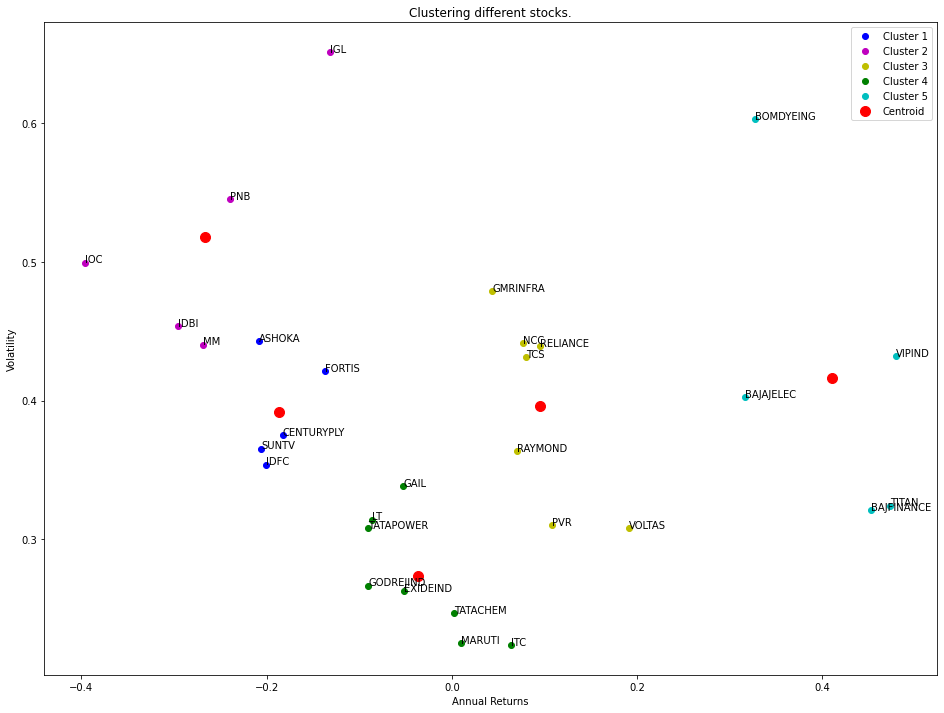

In [39]:
df_c = new_df.values

# computing K-Means with K = 5 (5 clusters)
centroids, _ = kmeans(df_c, 5)

# assign each sample to a cluster
idx, _ = vq(df_c, centroids)


plt.figure(figsize=(16, 12))
# some plotting using numpy's logical indexing
plt.plot(df_c[idx == 0, 0], df_c[idx == 0, 1], 'ob', label='Cluster 1')
plt.plot(df_c[idx == 1, 0], df_c[idx == 1, 1], 'om', label='Cluster 2')
plt.plot(df_c[idx == 2, 0], df_c[idx == 2, 1], 'oy', label='Cluster 3')
plt.plot(df_c[idx == 3, 0], df_c[idx == 3, 1], 'og', label='Cluster 4')
plt.plot(df_c[idx == 4, 0], df_c[idx == 4, 1], 'oc', label='Cluster 5')

plt.plot(centroids[:, 0], centroids[:, 1], 'or', markersize=10, label='Centroid')

for i in range(len(new_df)):
    plt.annotate(new_df.index[i], xy=(new_df.Returns[i], new_df.Volatility[i]))

plt.title("Clustering different stocks.")
plt.xlabel("Annual Returns")
plt.ylabel("Volatility")
plt.legend()
plt.show()